In [2]:
from tqdm import tqdm
import sys
sys.path.append("/home/sambt/analytic-qg-classifiers/analysis/utils/")
from master import *
prefix = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/'

In [3]:
fq = prefix+'H2qq-CF3.0CA3.0-sqg0100-esq0011/total.root'
fg = prefix+'H2gg-CF3.0CA3.0-sqg0100/total.root'
X,Y = tools.pre_process(fq,fg,nev_max=20000,njets=2)
z = X[:,:,0].copy()
dEta = X[:,:,1].copy()
dPhi = X[:,:,2].copy()
dR = np.sqrt(dEta**2 + dPhi**2)
mults = np.count_nonzero(z,axis=1)
optimal = np.sum(np.power(z,2,where=z>0,out=np.zeros(z.shape)) + z,axis=1)

Loaded files at 0.17397379875183105
Read in arrays at 14.162555932998657
Cleaned events at 14.719220638275146
Made quark/gluon input arrays at 15.88866925239563
Finished preprocessing at 18.307918071746826


In [6]:
pfn, pfn_roc, pfn_auc = tools.train_qg_pfn(X,Y,n_epoch=3,summary=False)
pfn_z, pfn_z_roc, pfn_z_auc = tools.train_qg_pfn_no_angular(X,Y,n_epoch=3,summary=False)
pfn_noz, pfn_noz_roc, pfn_noz_auc = tools.train_qg_pfn_only_angular(X,Y,n_epoch=3,summary=False)
efn, efn_roc, efn_auc = tools.train_qg_efn(X,Y,n_epoch=3,summary=False)

Model summary:
Train on 28000 samples, validate on 6000 samples
Epoch 1/3
28000/28000 [==============================] - 4s 126us/step - loss: 0.7458 - acc: 0.5403 - val_loss: 0.6795 - val_acc: 0.5725
Epoch 2/3
28000/28000 [==============================] - 0s 16us/step - loss: 0.6815 - acc: 0.5783 - val_loss: 0.6729 - val_acc: 0.5850
Epoch 3/3
28000/28000 [==============================] - 0s 16us/step - loss: 0.6740 - acc: 0.5887 - val_loss: 0.6704 - val_acc: 0.5933
Finished training at 5.274969577789307

PFN AUC: 0.6312597148952894

Model summary:
Train on 28000 samples, validate on 6000 samples
Epoch 1/3
28000/28000 [==============================] - 1s 35us/step - loss: 0.7776 - acc: 0.4999 - val_loss: 0.6911 - val_acc: 0.5468
Epoch 2/3
28000/28000 [==============================] - 0s 16us/step - loss: 0.6928 - acc: 0.5166 - val_loss: 0.6889 - val_acc: 0.5483
Epoch 3/3
28000/28000 [==============================] - 0s 16us/step - loss: 0.6921 - acc: 0.5208 - val_loss: 0.6879 - va

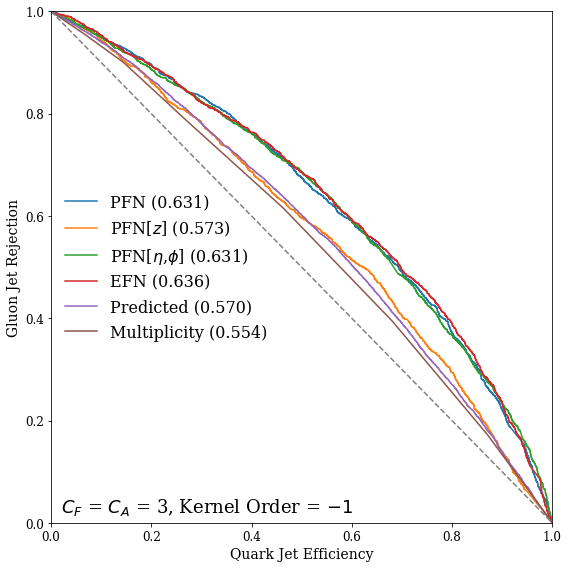

In [7]:
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
rocs = [pfn_roc,pfn_z_roc,pfn_noz_roc,efn_roc,optimal_roc,mult_roc]
aucs = [pfn_auc,pfn_z_auc,pfn_noz_auc,efn_auc,optimal_auc,mult_auc]
labels = ["PFN",r"PFN[$z$]",r"PFN[$\eta$,$\phi$]","EFN","Predicted","Multiplicity"]
plotting.plot_many(rocs,aucs,labels)